Here we use pandas to get stock information, do some exploratory analysis and then try to find ways of analyzing the risk of a stock, based on its performance history. Lastly, a Monte Carlo method is applied to predict future prices.

The following questions are addressed:
1. What was the change in price of the stock over time?
2. What about the average daily return of the stock?
3. And the moving averages of the various stocks?
4. Is there any correlation between different stocks' closing prices?
5. Is there any correlation between different stocks' daily returns?
6. How risky is investing in a particular stock?
7. What can we say about the future? 

In [1]:
!pip install seaborn
import pandas as pd
from pandas import Series, DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("whitegrid")
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from datetime import datetime

In [3]:
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas_datareader as pdr # used to get stocks

In [5]:
techList = ["AAPL", "GOOG", "MSFT", "AMZN"]
endDate = datetime.now()
startDate = datetime(endDate.year -1, endDate.month, endDate.day)

In [6]:
for stock in techList:
  # Using Yahoo Finance to get data
  globals()[stock] = pdr.data.DataReader(stock, 'yahoo', startDate, endDate)
  # globals sets our stock string name as a global variable.

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,155.132490,151.859604,153.401818,153.564941,8.665990e+07,153.256840
std,16.128826,15.360299,15.787043,15.750402,2.547913e+07,15.921563
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251923
25%,144.899994,142.720001,143.770004,144.570007,6.902390e+07,143.959946
50%,151.970001,149.720001,150.389999,150.960007,8.153200e+07,150.619995
75%,169.679993,165.500000,167.479996,166.559998,9.867070e+07,166.559998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-05-03 to 2022-05-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

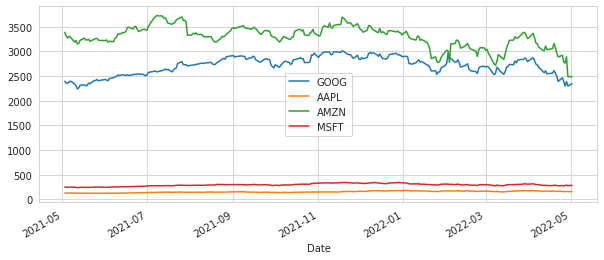

In [9]:
GOOG["Adj Close"].plot(label="GOOG", legend=True, figsize=(10, 4))
AAPL["Adj Close"].plot(label="AAPL", legend=True, figsize=(10, 4))
AMZN["Adj Close"].plot(label="AMZN", legend=True, figsize=(10, 4))
MSFT["Adj Close"].plot(label="MSFT", legend=True, figsize=(10, 4))


<AxesSubplot:xlabel='Date'>

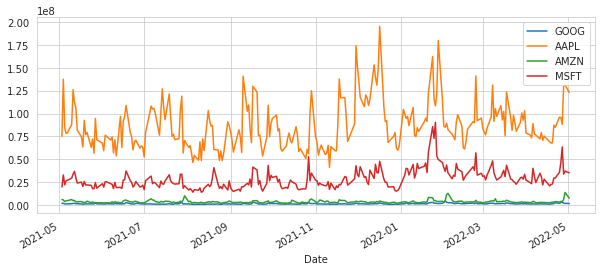

In [10]:
GOOG["Volume"].plot(label="GOOG", legend=True, figsize=(10, 4))
AAPL["Volume"].plot(label="AAPL", legend=True, figsize=(10, 4))
AMZN["Volume"].plot(label="AMZN", legend=True, figsize=(10, 4))
MSFT["Volume"].plot(label="MSFT", legend=True, figsize=(10, 4))


## Let us now analyze the moving averages and the daily returns

In [11]:
ma_day = [10, 20, 50]
for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()
  AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma).mean()
  GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma).mean()
  MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:title={'center':'AAPL'}, xlabel='Date'>

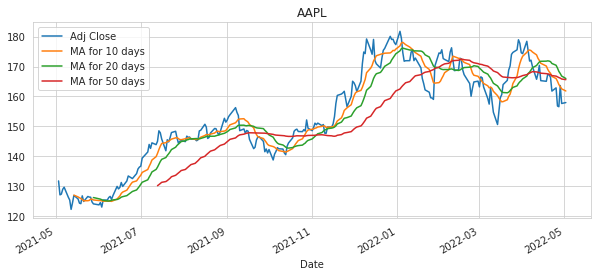

In [12]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(title="AAPL",subplots=False, figsize=(10,4))

<AxesSubplot:title={'center':'GOOG'}, xlabel='Date'>

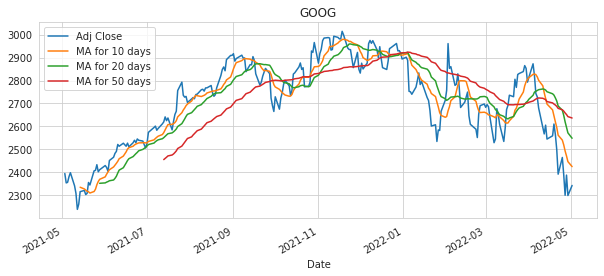

In [13]:
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(title="GOOG",subplots=False, figsize=(10,4))

<AxesSubplot:title={'center':'AMZN'}, xlabel='Date'>

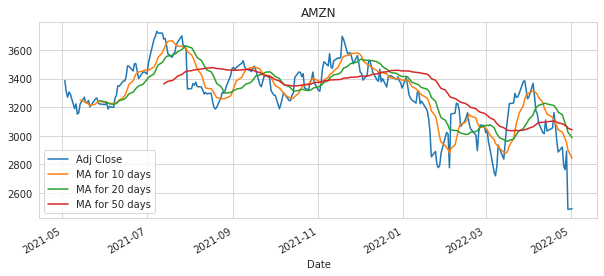

In [14]:
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(title="AMZN",subplots=False, figsize=(10,4))

<AxesSubplot:title={'center':'MSFT'}, xlabel='Date'>

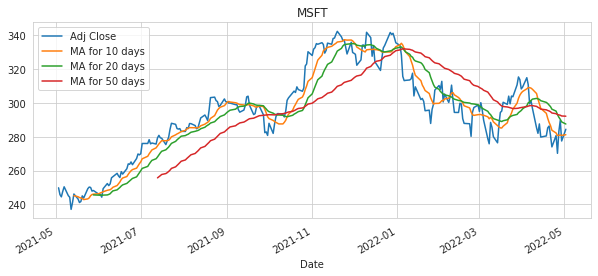

In [15]:
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(title="MSFT",subplots=False, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

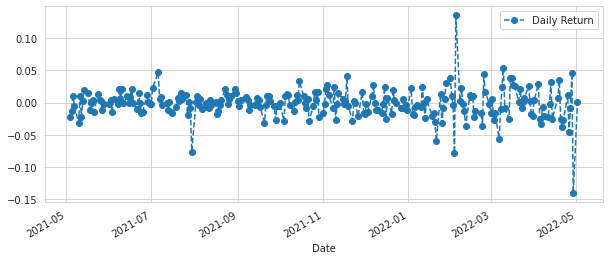

In [16]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
AMZN['Daily Return'].plot(figsize=(10,4), legend=True, marker='o', linestyle='--')

<AxesSubplot:xlabel='Date'>

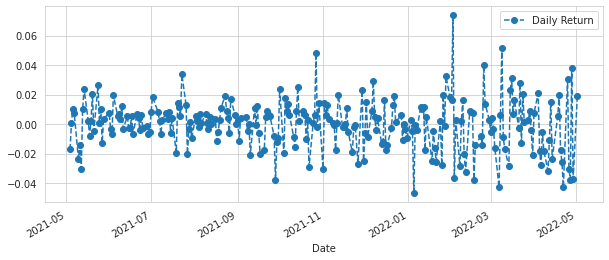

In [17]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(10,4), legend=True, marker='o', linestyle='--')

<AxesSubplot:xlabel='Date'>

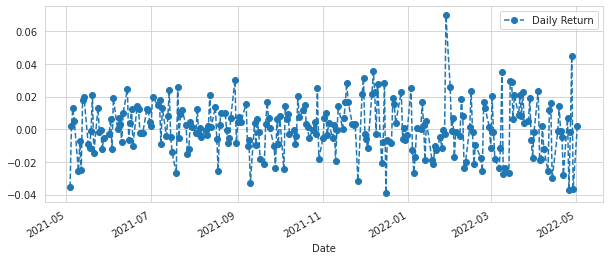

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, marker='o', linestyle='--')

<AxesSubplot:xlabel='Date'>

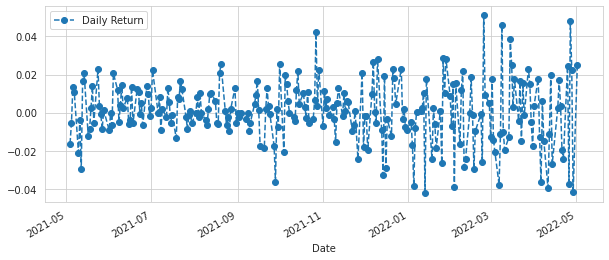

In [19]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
MSFT['Daily Return'].plot(figsize=(10,4), legend=True, marker='o', linestyle='--')

/home/rafaelcosta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AMZN daily returns for the last year')

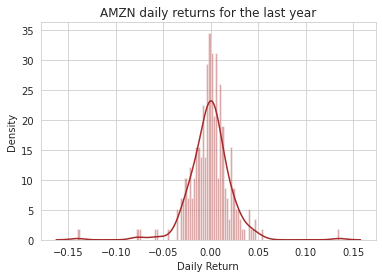

In [20]:
sns.distplot(AMZN['Daily Return'].dropna(), bins=120, color='brown').set_title("AMZN daily returns for the last year")

/home/rafaelcosta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GOOG daily returns for the last year')

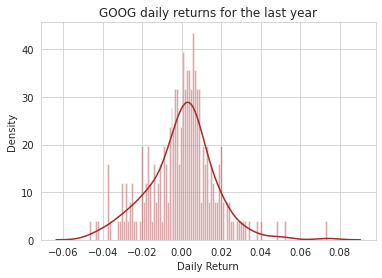

In [21]:
sns.distplot(GOOG['Daily Return'].dropna(), bins=120, color='brown').set_title("GOOG daily returns for the last year")

/home/rafaelcosta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AAPL daily returns for the last year')

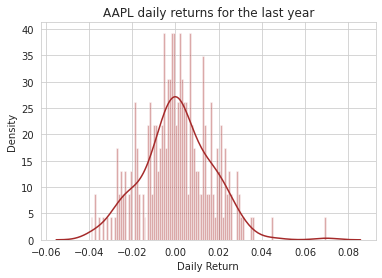

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=120, color='brown').set_title("AAPL daily returns for the last year")

/home/rafaelcosta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MSFT daily returns for the last year')

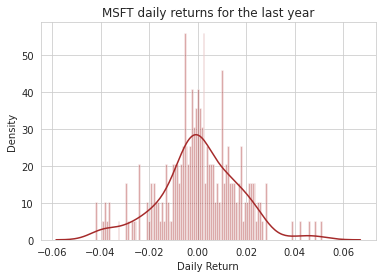

In [23]:
sns.distplot(MSFT['Daily Return'].dropna(), bins=120, color='brown').set_title("MSFT daily returns for the last year")

## Let us focus on daily returns; to do that, we'll isolate the data in a single dataframe

In [24]:
# But I won't get into the trouble of concatenating and then putting the right indexes; let us just get the data from Yahoo again, this time only requiring the Adj Close columns
adjClose_df = pdr.data.DataReader(techList, 'yahoo', startDate, endDate)["Adj Close"]
adjClose_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-03,131.756882,2395.169922,249.825058,3386.489990
2021-05-04,127.094612,2354.250000,245.787949,3311.870117
2021-05-05,127.343140,2356.739990,244.478622,3270.540039
2021-05-06,128.973450,2381.350098,247.712265,3306.370117
2021-05-07,129.660538,2398.689941,250.420227,3291.610107


In [25]:
# gathering the returns
techReturns = adjClose_df.pct_change()

In [26]:
techReturns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-03,NaN,NaN,NaN,NaN
2021-05-04,-0.035385,-0.017084,-0.016160,-0.022035
2021-05-05,0.001955,0.001058,-0.005327,-0.012479
2021-05-06,0.012802,0.010442,0.013227,0.010955
2021-05-07,0.005327,0.007282,0.010932,-0.004464


/home/rafaelcosta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


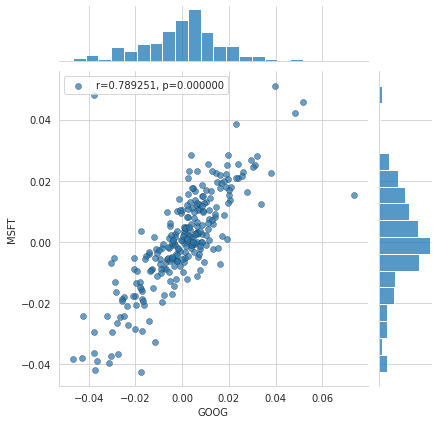

In [27]:
# is there any correlation between them?
jp = sns.jointplot("GOOG", "MSFT", techReturns, alpha=.7, edgecolor=".2", linewidth=.5)
r, p = stats.pearsonr(techReturns["GOOG"].dropna(), techReturns["MSFT"].dropna())
# jp.annotate(stats.pearsonr)
jp.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
plt.show()

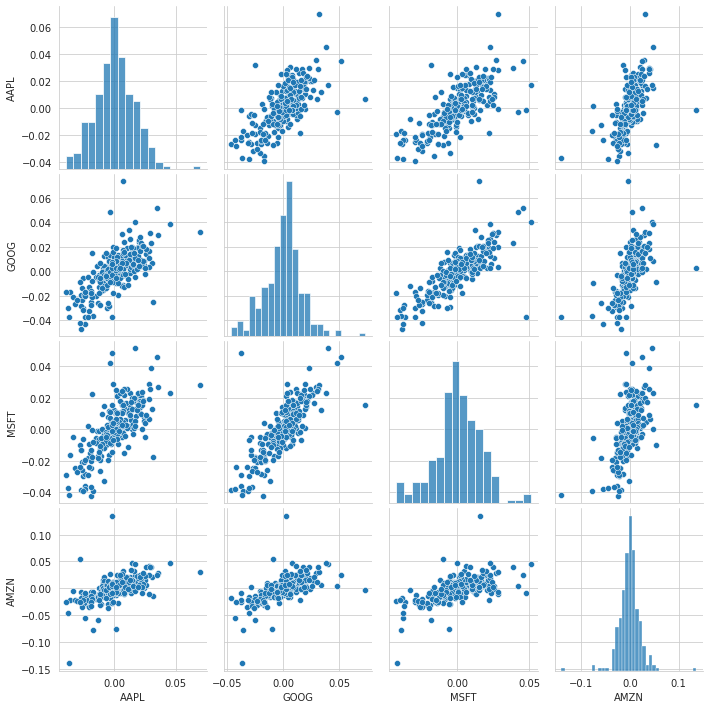

In [28]:
# Let's see them all at once!
sns.pairplot(techReturns.dropna())

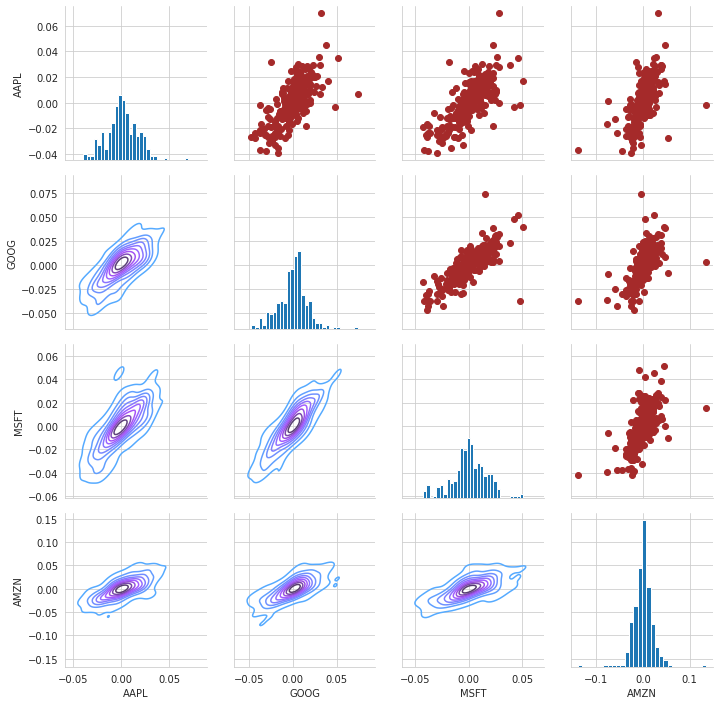

In [29]:
returnsFig = sns.PairGrid(techReturns.dropna())
returnsFig.map_upper(plt.scatter, color="brown")
returnsFig.map_lower(sns.kdeplot, cmap="cool_d")
returnsFig.map_diag(plt.hist, bins=30)


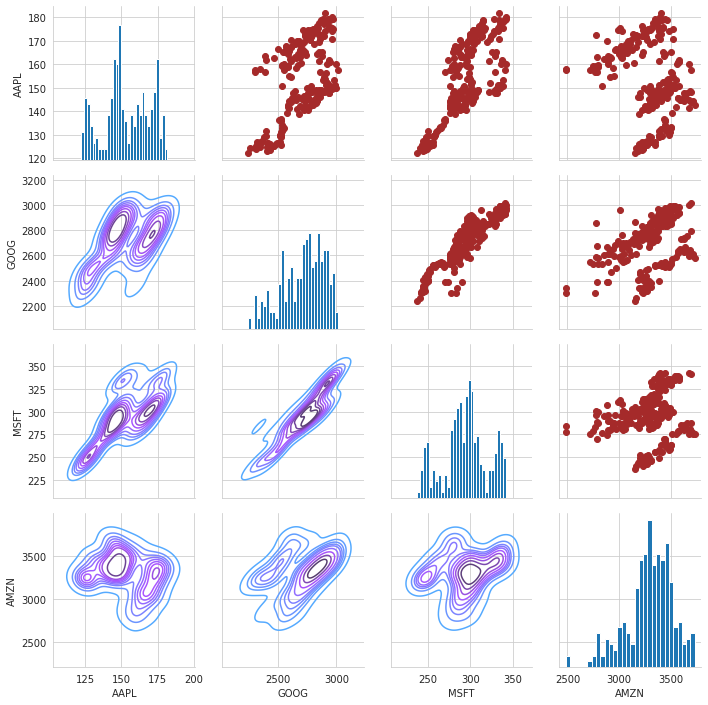

In [30]:
# Now for the closing prices
returnsFig = sns.PairGrid(adjClose_df.dropna())
returnsFig.map_upper(plt.scatter, color="brown")
returnsFig.map_lower(sns.kdeplot, cmap="cool_d")
returnsFig.map_diag(plt.hist, bins=30)


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

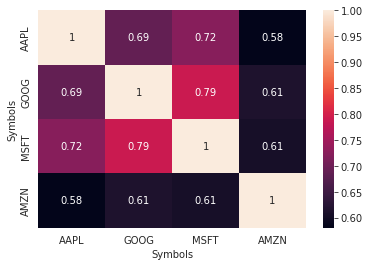

In [31]:
# Let us visualize the correlation matrix for the daily returns
sns.heatmap(techReturns.dropna().corr(), annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

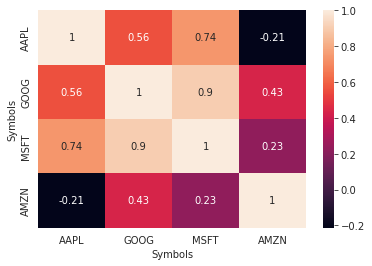

In [32]:
# Now, the correlation matrix for the closing prices
sns.heatmap(adjClose_df.dropna().corr(), annot=True)

## Risk analysis

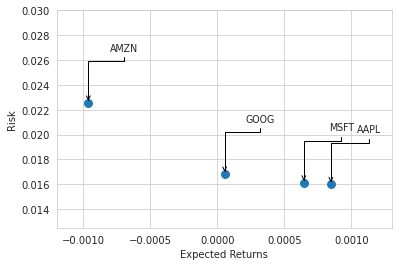

In [72]:
returns = techReturns.dropna()
area = np.pi * 20  # circles area
mean_returns = returns.mean()
std_returns = returns.std()
plt.scatter(mean_returns, std_returns, s=area)
plt.xlabel("Expected Returns")
plt.ylabel("Risk")
plt.ylim(0.0125, 0.03)
plt.xlim(-0.0012, 0.0013)
for label, x, y in zip(returns.columns, mean_returns, std_returns):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(50, 50),
        textcoords="offset points",
        ha="right",
        va="bottom",
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="bar, angle=180, fraction=-.2",
            color="black",
        ),
        fontsize=9.5
    )


### Using the "Bootstrap Method" to calculate a Value at Risk parameter

/home/rafaelcosta/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

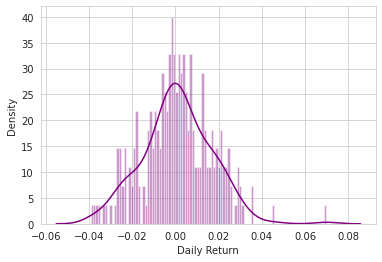

In [78]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')
# sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', kde=True) #<-- non-deprecated way to do (almost) the same thing

In [79]:
returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-04,-0.035385,-0.017084,-0.016160,-0.022035
2021-05-05,0.001955,0.001058,-0.005327,-0.012479
2021-05-06,0.012802,0.010442,0.013227,0.010955
2021-05-07,0.005327,0.007282,0.010932,-0.004464
2021-05-10,-0.025804,-0.023775,-0.020914,-0.030721


In [90]:
tail=0.00000001
returns['AAPL'].quantile(tail) #with (1-tail)*100 % confidence, gives the worst daily loss possible

-0.03926385203955233

## Markov Process via Monte Carlo
see more about it [here](https://www.investopedia.com/articles/07/montecarlo.asp)

In [116]:
days = 365
dt = 1/days
# Do it for AMZN as example
mu = mean_returns['GOOG']
sigma = std_returns['GOOG']
mu, sigma

(5.3944913158498765e-05, 0.016839410890395645)

In [97]:
def stock_MC(starting_price, days, mu, sigma):
    prices = np.ones(days) * starting_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        # using the GRW equation
        drift[x] = mu * dt
        shock[x] = np.random.normal(loc=drift[x], scale=sigma * np.sqrt(dt))
        prices[x] = prices[x - 1] + (prices[x - 1] * (drift[x] + shock[x]))
    return prices


In [117]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-05-03,2419.699951,2384.500000,2402.719971,2395.169922,1689400,2395.169922,NaN,NaN,NaN,NaN
2021-05-04,2379.260010,2311.699951,2369.739990,2354.250000,1756000,2354.250000,NaN,NaN,NaN,-0.017084
2021-05-05,2382.199951,2351.409912,2368.419922,2356.739990,1090300,2356.739990,NaN,NaN,NaN,0.001058
2021-05-06,2382.709961,2342.337891,2350.639893,2381.350098,1030900,2381.350098,NaN,NaN,NaN,0.010442
2021-05-07,2416.409912,2390.000000,2400.000000,2398.689941,1163600,2398.689941,NaN,NaN,NaN,0.007282


Text(0.5, 1.0, 'Monte Carlo Analysis for GOOG')

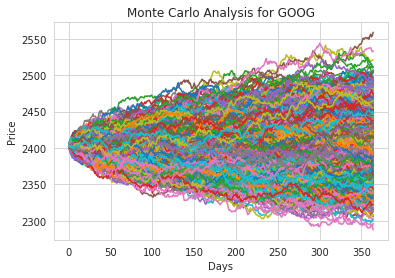

In [121]:
starting_price = 2402.719971
for run in range(1000):
    plt.plot(stock_MC(starting_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for GOOG")


In [120]:
runs = 20000

simulations = np.zeros(runs)

for run in range(runs):
  simulations[run] = stock_MC(starting_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

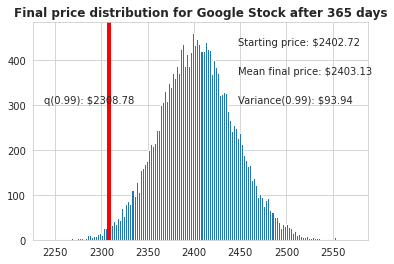

In [122]:
tail = 1
formatted_confidence_interval = str(round((100-tail)/100,2))
q = np.percentile(simulations, tail)
var_tail = starting_price - q
plt.hist(simulations, bins=150)
plt.figtext(0.6, 0.8, s="Starting price: $%.2f" % starting_price)
plt.figtext(0.6, 0.7, s="Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "Variance("+formatted_confidence_interval+"): $%.2f" % var_tail)
plt.figtext(0.15, 0.6, "q("+formatted_confidence_interval+"): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='red')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')


It is easy to see how a function can be defined such as to output the aforegiven graphs for any inputted stock name. This is left as exercise.